<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE40455-2020](https://jckantor.github.io/CBE40455-2020);
content is available [on Github](https://github.com/jckantor/CBE40455-2020.git).*


<!--NAVIGATION-->
< [3.1 Python Generators](https://jckantor.github.io/CBE40455-2020/03.01-Python-Generators.html) | [Contents](toc.html) | [3.10 Agent based model for control of COVID-19 on a college campus](https://jckantor.github.io/CBE40455-2020/03.10-Agent-based-campus-covid-model.html)<p><a href="https://colab.research.google.com/github/jckantor/CBE40455-2020/blob/master/docs/03.02-Simpy.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE40455-2020/03.02-Simpy.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.2 Simpy

In [2]:
!pip install simpy

## 3.2.1 Simplest possible Simpy model

Simpy implements a simulation Environment() object that schedules all of the events and processing that occurs when building complex models. The simplest possible Simpy model is one that creates an environment and runs it for a known simulation period.

In [11]:
import simpy

env = simpy.Environment()
env.run()

Simpy models are implemented as in the form of Python generators that yield Simpy events. The environment's `timeout(t)` event is one that you will use in many models. In Simpy, the statement

    yield env.timeout(t)
    
returns control for a simulated time period of length `t`.  You need to register each generator

In [14]:
import simpy

def mymodel():
    print("time =", env.now)          # print current time in the simulation
    yield env.timeout(1)              # take a time out of 1 time unit
    print("time =", env.now)          # print current time in the simulation

model = mymodel()                     # create an instance of the generator

env = simpy.Environment()             # create the simulation environment
env.process(model)                    # tell the simulation environment which generators to process
env.run()                             # run the simulation

time = 0
time = 1


Simulations usually include multiple generators

In [16]:
import simpy

def mymodel(dt):
    print("time =", env.now)          # print current time in the simulation
    yield env.timeout(dt)             # take a time out of dt time unit
    print("time =", env.now)          # print current time in the simulation
    
modelA = mymodel(3)
modelB = mymodel(2.4)

env = simpy.Environment()             # create the simulation environment
env.process(modelA)                   # tell the simulation environment which generators to process
env.process(modelB)                   # tell the simulation environment which generators to process
env.run()                             # run the simulation

time = 0
time = 0
time = 2.4
time = 3


**Exercise**: Add a name to identify each process.

In [17]:
# modify the previous cell to add a unique name for each process.

### 3.2.1.1 Simpy models are about events

In Simpy, `env.timeout(t)` refers to an event. A timeout event tells the simulation environment to come back to me in a point `t` time units in the future.  A simulation runs until it runs until there are no more events to process.

In [26]:
import simpy

def clock_model(name, dt):
    t = 0.0
    while t < 10.0:
        print(name, "time =", env.now)
        yield env.timeout(dt)
        t = t + dt

env = simpy.Environment()

env.process(clock_model("A", 1.0))
env.process(clock_model("B", 2.1))
env.run()

A time = 0
B time = 0
A time = 1.0
A time = 2.0
B time = 2.1
A time = 3.0
A time = 4.0
B time = 4.2
A time = 5.0
A time = 6.0
B time = 6.300000000000001
A time = 7.0
A time = 8.0
B time = 8.4
A time = 9.0


Another way to end a simulation is use the `until` parameter in `env.run()`

In [27]:
import simpy

def clock_model(name, dt):
    t = 0.0
    while True:
        print(name, "time =", env.now)
        yield env.timeout(dt)
        t = t + dt

env = simpy.Environment()

env.process(clock_model("A", 1.0))
env.process(clock_model("B", 2.1))
env.run(until=10)

A time = 0
B time = 0
A time = 1.0
A time = 2.0
B time = 2.1
A time = 3.0
A time = 4.0
B time = 4.2
A time = 5.0
A time = 6.0
B time = 6.300000000000001
A time = 7.0
A time = 8.0
B time = 8.4
A time = 9.0


## 3.2.2 Exercise

Write a Python generator that simulates the response of a differential equation describing concentration in a stirred tank reactor.

$$\frac{dC}{dt} = -k C + q(t)$$

where k = 1.0,  C(0) = 1.0 and q(t) = 0.5. Use Euler's approximation.

In [65]:
import simpy

q = 0.5

def reactor(dt, k):
    C = 1.0
    while True:
        print(round(env.now, 2), round(C, 2))
        yield env.timeout(dt)
        C = C - k*dt*C + q*dt
        
env = simpy.Environment()
env.process(reactor(0.1, 1.0))
env.run(until=5)

0 1.0
0.1 0.95
0.2 0.91
0.3 0.86
0.4 0.83
0.5 0.8
0.6 0.77
0.7 0.74
0.8 0.72
0.9 0.69
1.0 0.67
1.1 0.66
1.2 0.64
1.3 0.63
1.4 0.61
1.5 0.6
1.6 0.59
1.7 0.58
1.8 0.58
1.9 0.57
2.0 0.56
2.1 0.55
2.2 0.55
2.3 0.54
2.4 0.54
2.5 0.54
2.6 0.53
2.7 0.53
2.8 0.53
2.9 0.52
3.0 0.52
3.1 0.52
3.2 0.52
3.3 0.52
3.4 0.51
3.5 0.51
3.6 0.51
3.7 0.51
3.8 0.51
3.9 0.51
4.0 0.51
4.1 0.51
4.2 0.51
4.3 0.51
4.4 0.5
4.5 0.5
4.6 0.5
4.7 0.5
4.8 0.5
4.9 0.5
5.0 0.5


## 3.2.3 Monitoring

The purpose of simulation is to gather information on systems behave. For that  purpose, we need to monitor. An easy way to do this is to append data to a log.

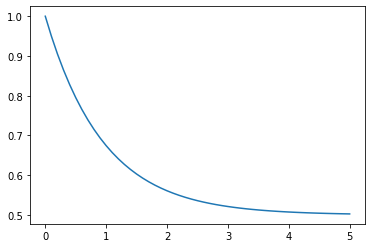

In [30]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

q = 0.5

data_log = []

def reactor(dt, k):
    C = 1.0
    while True:
        data_log.append([env.now, C])
        yield env.timeout(dt)
        C = C - k*dt*C + q*dt
        
env = simpy.Environment()
env.process(reactor(0.1, 1.0))
env.run(until=5)

data =  np.array(data_log)
plt.plot(data[:,0], data[:,1])

## 3.2.4 Creating Events

Start Reactor


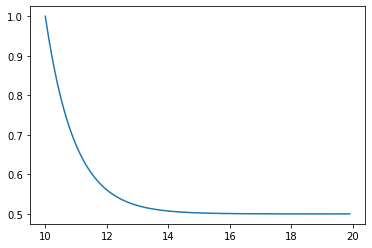

In [35]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

q = 0.5

data_log = []

def startup():
    yield env.timeout(10)
    print("Start Reactor")
    start_reactor.succeed()

def reactor(dt, k):
    yield start_reactor
    C = 1.0
    while True:
        data_log.append([env.now, C])
        yield env.timeout(dt)
        C = C - k*dt*C + q*dt
        
env = simpy.Environment()
start_reactor = env.event()
env.process(startup())
env.process(reactor(0.1, 1.0))
env.run(until=20)

data =  np.array(data_log)
plt.plot(data[:,0], data[:,1])

## 3.2.5 Modeling COVID


$$\text{Susceptible}
\xrightarrow {\frac{\beta S I}{N}} 
\text{Exposed} 
\xrightarrow{\alpha E} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$


In [36]:
import simpy

N = 20

data_log = [[]]

def infect():
    k = 0
    while k <= N:
        yield env.timeout(1)
        infect_person[k].succeed()
        k = k + 1
        
def person(id):
    yield infect_person[id]
    print(id, "infected at time", env.now)
    
env = simpy.Environment()

population = [person(k) for k in range(N)]
infect_person = [env.event() for k in range(N)]

env.process(infect)


### 3.2.5.1 Modeling with Python Classes

The new problem that we have is accessing the value of C outside the context of the generator. We'd like to do this because other process units may depend on that concentration.

In [ ]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

q = 0.5

data_log = []

def reactor(dt, k):
    C = 1.0
    env.event
    while True:
        data_log.append([env.now, C])
        yield env.timeout(dt)
        C = C - k*dt*C + q*dt
        
env = simpy.Environment()
env.process(reactor(0.1, 1.0))
env.run(until=5)

data =  np.array(data_log)
plt.plot(data[:,0], data[:,1])

In [82]:
import simpy

q = 0.5

class Reactor():
    def __init__(self, k, dt):
        self.k = k
        self.dt = dt
        self.C = 1.0
        
    def run(self):
        while True:
            print(round(env.now, 2), round(self.C, 2))
            yield env.timeout(self.dt)
            self.C = self.C - self.k*self.C*self.dt + q*self.dt

env = simpy.Environment()
a = Reactor(1.0, 0.2)
b = Reactor(1.4, 0.1)
env.process(a.run())
env.process(b.run())
env.run(until=10)

0 1.0
0 1.0
0.1 0.91
0.2 0.9
0.2 0.83
0.3 0.77
0.4 0.82
0.4 0.71
0.5 0.66
0.6 0.62
0.6 0.76
0.7 0.58
0.8 0.55
0.8 0.7
0.9 0.52
1.0 0.5
1.0 0.66
1.1 0.48
1.2 0.63
1.2 0.46
1.3 0.45
1.4 0.6
1.4 0.43
1.5 0.42
1.6 0.58
1.6 0.41
1.7 0.41
1.8 0.57
1.8 0.4
1.9 0.39
2.0 0.55
2.0 0.39
2.1 0.38
2.2 0.54
2.2 0.38
2.3 0.38
2.4 0.53
2.4 0.37
2.5 0.37
2.6 0.53
2.6 0.37
2.7 0.37
2.8 0.52
2.8 0.37
2.9 0.37
3.0 0.52
3.0 0.36
3.1 0.36
3.2 0.51
3.2 0.36
3.3 0.36
3.4 0.51
3.4 0.36
3.5 0.36
3.6 0.51
3.6 0.36
3.7 0.36
3.8 0.51
3.8 0.36
3.9 0.36
4.0 0.51
4.0 0.36
4.1 0.36
4.2 0.5
4.2 0.36
4.3 0.36
4.4 0.36
4.4 0.5
4.5 0.36
4.6 0.36
4.6 0.5
4.7 0.36
4.8 0.36
4.8 0.5
4.9 0.36
5.0 0.36
5.0 0.5
5.1 0.36
5.2 0.36
5.2 0.5
5.3 0.36
5.4 0.36
5.4 0.5
5.5 0.36
5.6 0.36
5.6 0.5
5.7 0.36
5.8 0.36
5.8 0.5
5.9 0.36
6.0 0.36
6.0 0.5
6.1 0.36
6.2 0.36
6.2 0.5
6.3 0.36
6.4 0.36
6.4 0.5
6.5 0.36
6.6 0.36
6.6 0.5
6.7 0.36
6.8 0.36
6.8 0.5
6.9 0.36
7.0 0.36
7.0 0.5
7.1 0.36
7.2 0.36
7.2 0.5
7.3 0.36
7.4 0.36
7.4 0.5
7.5 0.36
7.

In [79]:
import simpy

q = 0.5

def historian(dt):
    while True:
        print(env.now, a.C)
        yield env.timeout(dt)

class Reactor():
    def __init__(self, k, dt):
        self.k = k
        self.dt = dt
        self.C = 1.0
        
    def run(self):
        while True:
            yield env.timeout(self.dt)
            self.C = self.C - self.k*self.C*self.dt + q*self.dt

env = simpy.Environment()
a = Reactor(1.0, 0.2)
env.process(a.run())
env.process(historian(0.3))
env.run(until=10)

0 1.0
0.3 0.9
0.6 0.82
0.8999999999999999 0.7047999999999999
1.2 0.6638399999999999
1.5 0.6048575999999999
1.8 0.5671088639999999
2.1 0.5536870911999999
2.4 0.54294967296
2.6999999999999997 0.5274877906944
2.9999999999999996 0.52199023255552
3.2999999999999994 0.5140737488355328
3.599999999999999 0.5112589990684262
3.899999999999999 0.5072057594037928
4.199999999999999 0.5057646075230342
4.499999999999999 0.5036893488147418
4.799999999999999 0.5029514790517935
5.099999999999999 0.5018889465931478
5.399999999999999 0.5015111572745182
5.699999999999998 0.5009671406556917
5.999999999999998 0.5007737125245534
6.299999999999998 0.5004951760157141
6.599999999999998 0.5003961408125713
6.899999999999998 0.5002535301200457
7.1999999999999975 0.5002028240960366
7.499999999999997 0.5001298074214634
7.799999999999997 0.5001038459371707
8.099999999999998 0.5000664613997893
8.399999999999999 0.5000531691198314
8.7 0.5000340282366922
9.0 0.5000272225893537
9.3 0.5000174224571864
9.600000000000001 0.5

### 3.2.5.2 COVID Model

In [ ]:
import simpy

import random

class person()
    print
    yield env.timeout(random.uniform(0, 120))

<!--NAVIGATION-->
< [3.1 Python Generators](https://jckantor.github.io/CBE40455-2020/03.01-Python-Generators.html) | [Contents](toc.html) | [3.10 Agent based model for control of COVID-19 on a college campus](https://jckantor.github.io/CBE40455-2020/03.10-Agent-based-campus-covid-model.html)<p><a href="https://colab.research.google.com/github/jckantor/CBE40455-2020/blob/master/docs/03.02-Simpy.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE40455-2020/03.02-Simpy.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>